In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\franc\Downloads\Machine Predictive Maintenance Classification\predictive_maintenance.csv"
data = pd.read_csv(file_path)

In [6]:
# Display the first few rows of the dataset
print(data.head())

# Check column names to confirm the target column
print(data.columns)

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 

In [8]:
# Preprocessing
# Separate features and target variable
# Use 'Target' as the target column
X = data.drop(columns=['Target', 'UDI', 'Product ID', 'Failure Type'])  # Drop non-feature columns
y = data['Target']

# Handle categorical attribute 'Type' using one-hot encoding
X = pd.get_dummies(X, columns=['Type'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [9]:
# K-Nearest Neighbors (KNN)
# Hyperparameter tuning using GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best parameters and model
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluate KNN
print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn)}")
print(f"Recall: {recall_score(y_test, y_pred_knn)}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn)}")

KNN Results:
Accuracy: 0.977
Precision: 0.7222222222222222
Recall: 0.41935483870967744
F1-Score: 0.5306122448979592


In [11]:
# Decision Tree with GridSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 7, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best parameters and model
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_dt)}")
print(f"Recall: {recall_score(y_test, y_pred_dt)}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt)}")

Decision Tree Results:
Accuracy: 0.983
Precision: 0.8088235294117647
Recall: 0.5913978494623656
F1-Score: 0.6832298136645962


In [13]:
# Artificial Neural Network (ANN)
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Number of neurons in each hidden layer
    'activation': ['relu', 'tanh'],  # Activation function
    'learning_rate_init': [0.001, 0.01, 0.1]  # Learning rate
}

ann = MLPClassifier(random_state=42, max_iter=1000)
grid_search_ann = GridSearchCV(ann, param_grid_ann, cv=5, scoring='accuracy')
grid_search_ann.fit(X_train, y_train)

# Best parameters and model
best_ann = grid_search_ann.best_estimator_
y_pred_ann = best_ann.predict(X_test)

# Evaluate ANN
print("ANN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann)}")
print(f"Precision: {precision_score(y_test, y_pred_ann)}")
print(f"Recall: {recall_score(y_test, y_pred_ann)}")
print(f"F1-Score: {f1_score(y_test, y_pred_ann)}")

ANN Results:
Accuracy: 0.9843333333333333
Precision: 0.8194444444444444
Recall: 0.6344086021505376
F1-Score: 0.7151515151515151


In [14]:
# Boosting Algorithm (AdaBoost)
param_grid_ada = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0]  # Learning rate
}

ada = AdaBoostClassifier(random_state=42)
grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)

# Best parameters and model
best_ada = grid_search_ada.best_estimator_
y_pred_ada = best_ada.predict(X_test)

# Evaluate AdaBoost
print("AdaBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f"Precision: {precision_score(y_test, y_pred_ada)}")
print(f"Recall: {recall_score(y_test, y_pred_ada)}")
print(f"F1-Score: {f1_score(y_test, y_pred_ada)}")

AdaBoost Results:
Accuracy: 0.9743333333333334
Precision: 0.6142857142857143
Recall: 0.46236559139784944
F1-Score: 0.5276073619631901


In [15]:
# Visualizations
# Learning Curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()


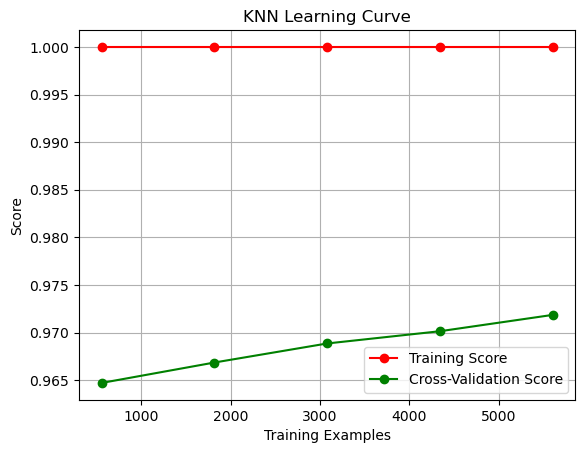

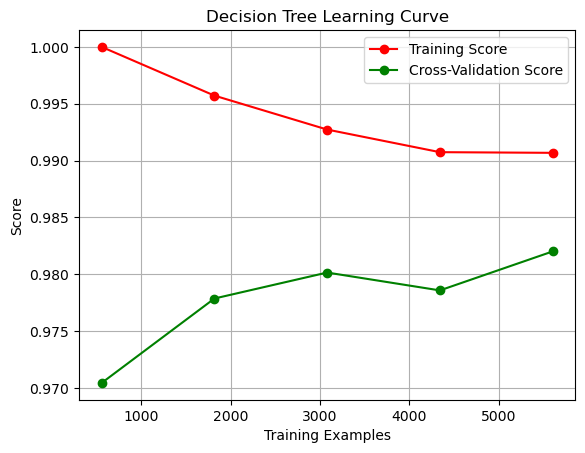

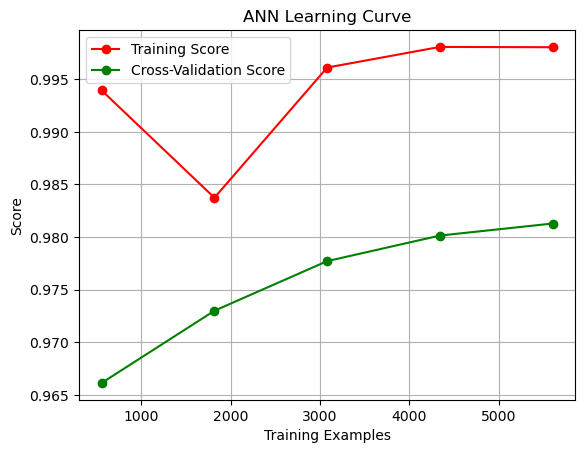

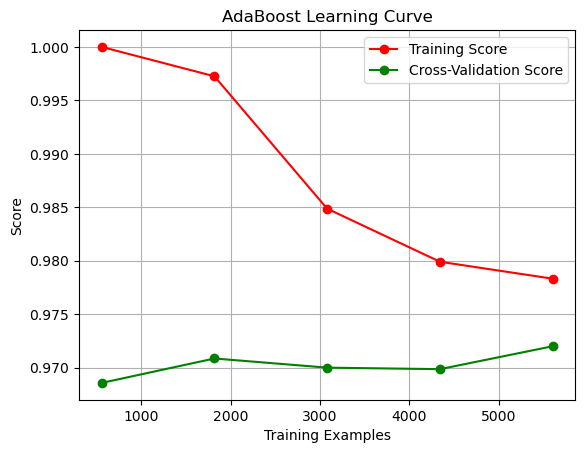

In [16]:
# Plot learning curves for each model
plot_learning_curve(best_knn, "KNN Learning Curve", X_train, y_train)
plot_learning_curve(best_dt, "Decision Tree Learning Curve", X_train, y_train)
plot_learning_curve(best_ann, "ANN Learning Curve", X_train, y_train)
plot_learning_curve(best_ada, "AdaBoost Learning Curve", X_train, y_train)

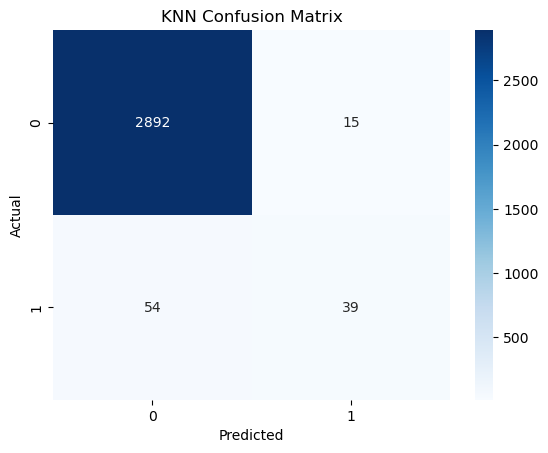

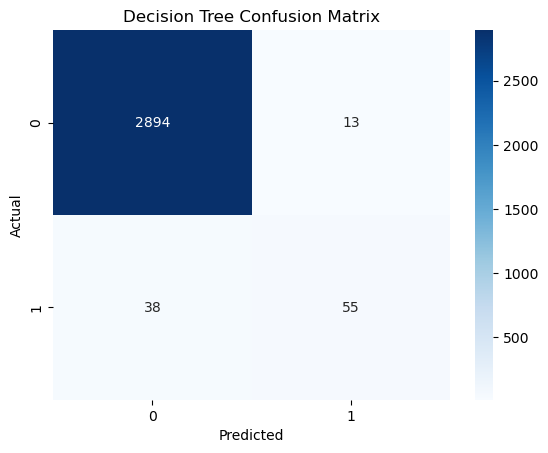

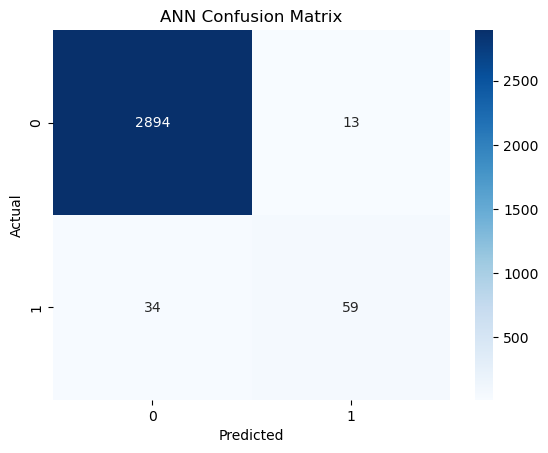

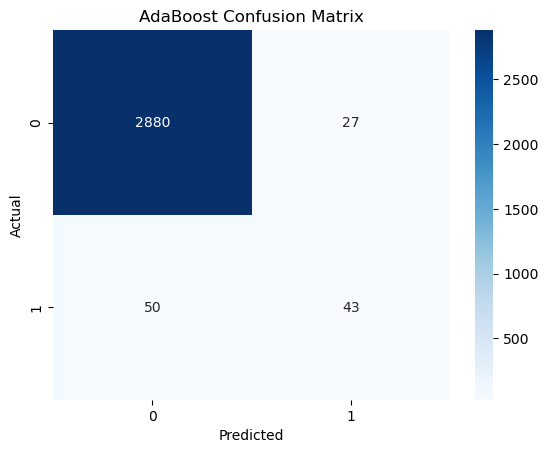

In [17]:
# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn, "KNN Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_ann, "ANN Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_ada, "AdaBoost Confusion Matrix")


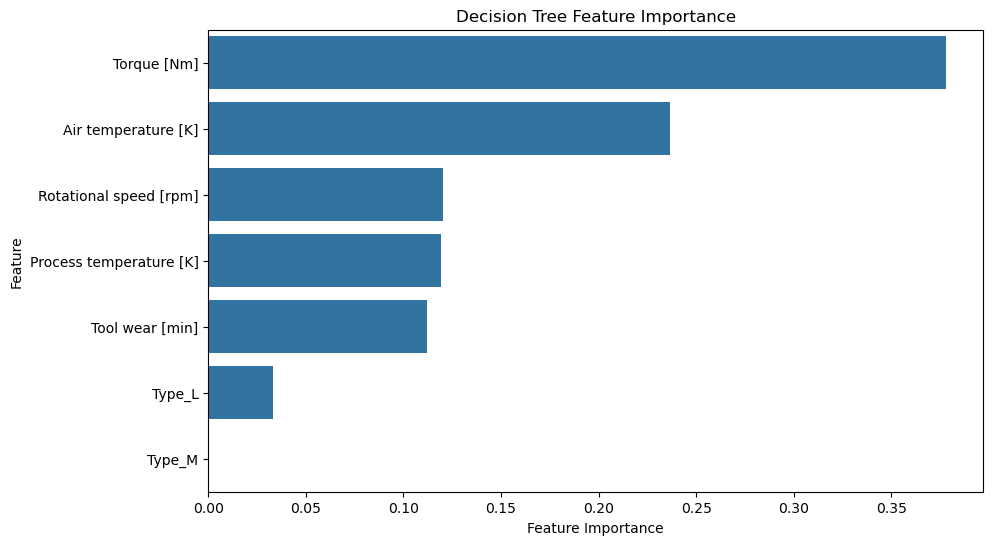

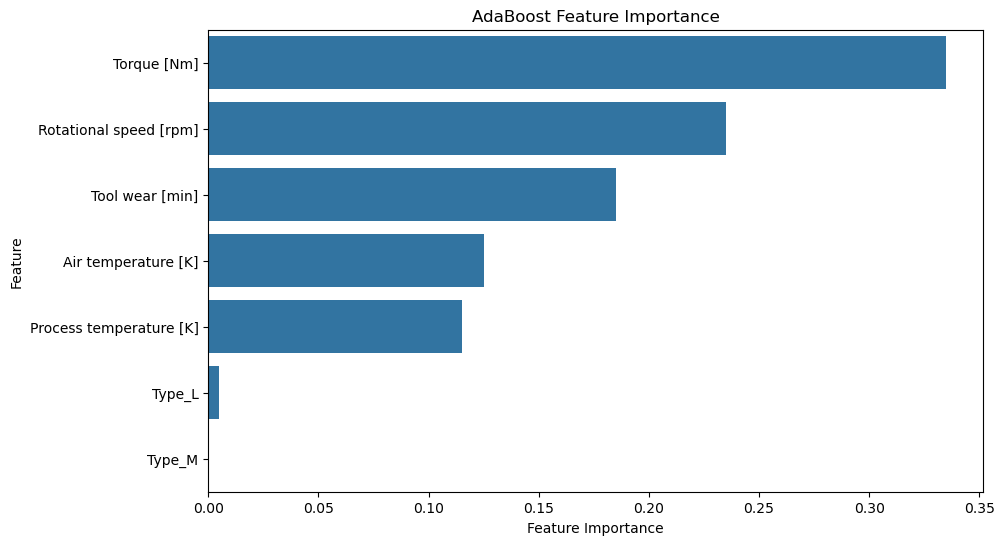

In [18]:
# Feature Importance Plots (for Decision Tree and AdaBoost)
def plot_feature_importance(importance, names, title):
    # Create a DataFrame to store feature importance
    feature_importance = pd.DataFrame({'feature': names, 'importance': importance})
    # Sort the DataFrame by importance
    feature_importance = feature_importance.sort_values(by='importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

# Get feature names after one-hot encoding
feature_names = X.columns

# Plot feature importance for Decision Tree
plot_feature_importance(best_dt.feature_importances_, feature_names, "Decision Tree Feature Importance")

# Plot feature importance for AdaBoost
plot_feature_importance(best_ada.feature_importances_, feature_names, "AdaBoost Feature Importance")

In [19]:
# Comparison of Algorithms
results = {
    'Algorithm': ['KNN', 'Decision Tree', 'ANN', 'AdaBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_ann), accuracy_score(y_test, y_pred_ada)],
    'Precision': [precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_ann), precision_score(y_test, y_pred_ada)],
    'Recall': [recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_ann), recall_score(y_test, y_pred_ada)],
    'F1-Score': [f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_ann), f1_score(y_test, y_pred_ada)]
}

results_df = pd.DataFrame(results)
print(results_df)

       Algorithm  Accuracy  Precision    Recall  F1-Score
0            KNN  0.977000   0.722222  0.419355  0.530612
1  Decision Tree  0.983000   0.808824  0.591398  0.683230
2            ANN  0.984333   0.819444  0.634409  0.715152
3       AdaBoost  0.974333   0.614286  0.462366  0.527607
